In [43]:
from matplotlib import pyplot as plt
import cv2
import yaml

## 载入配置


In [44]:
with open('config/camera_calibration.yaml', 'r', encoding='utf-8') as f:
    config = yaml.load(f.read(), Loader=yaml.SafeLoader)
n_row = config['caliboard']['row']
n_column = config['caliboard']['column']

## 读入图片

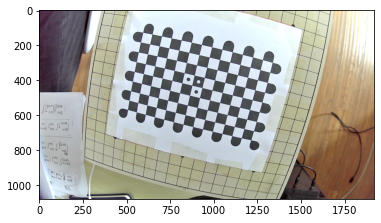

In [47]:
# 读入一个图片
img = cv2.imread("./data/19.png")
# 显示图像
plt.imshow(img[:,:, ::-1])

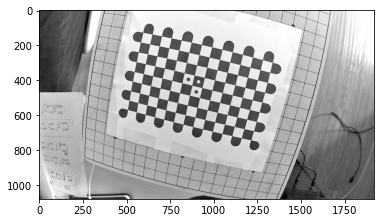

In [48]:
# 转换为灰度图
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")

In [54]:
# 标志位
# - cv2.CALIB_CB_ACCURACY： 上采样，保证亚像素级别的精度。
# - cv2.CALIB_CB_EXHAUSTIVE: 执行一个详细的搜索，提高检出率。
# - cv2.CALIB_CB_NORMALIZE_IMAGE：图像均衡化
# meta
# - 4：在画面中出现的marker里面，最左上角的那个marker(圆) 为白底黑圆
ret, corners, meta = cv2.findChessboardCornersSBWithMeta(img_gray, (n_row, n_column), \
        flags=cv2.CALIB_CB_ACCURACY|cv2.CALIB_CB_EXHAUSTIVE|cv2.CALIB_CB_NORMALIZE_IMAGE, meta=4)

print(f"角点检测结果：{ret}")

角点检测结果：True
[[2 1 2 1 2 1 2 1 0]
 [1 2 1 2 1 2 1 2 0]
 [2 1 2 1 2 1 2 1 0]
 [1 2 1 2 1 2 1 2 0]
 [2 1 2 1 2 1 2 1 0]
 [1 2 1 2 1 2 1 2 0]
 [2 1 2 1 2 1 2 1 0]
 [1 2 1 2 1 2 1 2 0]
 [2 1 2 1 2 1 2 1 0]
 [1 2 1 2 1 2 1 2 0]
 [2 1 2 1 2 1 2 1 0]
 [1 2 1 2 1 2 1 2 0]
 [2 1 2 1 2 1 2 1 0]
 [0 0 0 0 0 0 0 0 0]]


In [61]:
# 标志位
# - cv2.CALIB_CB_ACCURACY： 上采样，保证亚像素级别的精度。
# - cv2.CALIB_CB_EXHAUSTIVE: 执行一个详细的搜索，提高检出率。
# - cv2.CALIB_CB_NORMALIZE_IMAGE：图像均衡化
# meta
# - 4：在画面中出现的marker里面，最左上角的那个marker(圆) 为白底黑圆
ret, corners, meta = cv2.findChessboardCornersSBWithMeta(img_gray, (9, 14), \
        flags=cv2.CALIB_CB_ACCURACY|cv2.CALIB_CB_EXHAUSTIVE|cv2.CALIB_CB_NORMALIZE_IMAGE)

print(f"角点检测结果：{ret}")

角点检测结果：True


True

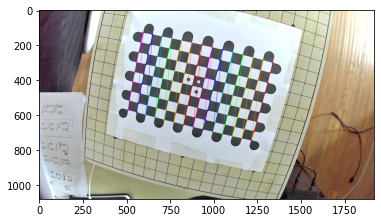

In [41]:
# 绘制棋盘
canvas = cv2.drawChessboardCorners(img, (n_row, n_column), corners, patternWasFound=True)
plt.imshow(canvas[:,:, ::-1])

cv2.imwrite("chessboard_canvas.png", canvas)